### Урок 3. TensorFlow

##### Домашнее задание


1. Постройте нейронную сеть(берем простую линейную сеть, которую разбирали на уроке: меняем число слоев, число нейронов , типы активации, тип оптимизатора) на датасет from sklearn.datasets import load_boston.

2. Измените функцию потерь и метрику для этой задачи. Постройте 10-15 вариантов и сведите результаты их работы в таблицу Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

Подключение библиотек


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import boston_housing

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
     

Загрузка и подготовка данных

In [2]:
(train_data, train_target), (test_data, test_target) = boston_housing.load_data()

print('train_data.shape', train_data.shape)
print('test_data.shape ', test_data.shape)

57026/57026 [==============================] - 0s 2us/step
train_data.shape (404, 13)
test_data.shape  (102, 13)


In [3]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

train_df = pd.DataFrame(train_data, columns=column_names)
train_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [4]:
scaler = MinMaxScaler((-1, 1))
X_train = scaler.fit_transform(train_data)
X_test = scaler.transform(test_data)

X_train

array([[-0.97243674, -1.        , -0.43695015, ...,  0.78723404,
         1.        , -0.06236203],
       [-0.99965269,  0.65      , -0.88489736, ..., -0.55319149,
         0.99233446, -0.92384106],
       [-0.89003245, -1.        ,  0.29325513, ...,  0.61702128,
         0.89217812, -0.91556291],
       ...,
       [-0.99936293, -0.3       , -0.58944282, ..., -0.08510638,
         0.82525594, -0.66335541],
       [-0.95182954, -1.        ,  0.40175953, ..., -0.55319149,
         0.31943114, -0.22406181],
       [-0.99981859,  0.2       , -0.81891496, ..., -0.36170213,
         0.898129  , -0.85375276]])

#### Задание 1

##### Модель 1.

1. Функция активации - relu
2. Количество слоев - 2
3. Оптимизацтор - Adam
4. Число нейронов в скрытом слое - [20, 30, 40, 50]

Epoch 1/150
3/3 [==============================] - 1s 85ms/step - loss: 589.9623 - mse: 589.9623 - val_loss: 680.7406 - val_mse: 680.7406
Epoch 2/150
3/3 [==============================] - 0s 17ms/step - loss: 587.0150 - mse: 587.0150 - val_loss: 677.7371 - val_mse: 677.7371
Epoch 3/150
3/3 [==============================] - 0s 17ms/step - loss: 584.1895 - mse: 584.1895 - val_loss: 674.7567 - val_mse: 674.7567
Epoch 4/150
3/3 [==============================] - 0s 17ms/step - loss: 581.2794 - mse: 581.2794 - val_loss: 671.8196 - val_mse: 671.8196
Epoch 5/150
3/3 [==============================] - 0s 18ms/step - loss: 578.4897 - mse: 578.4897 - val_loss: 668.8869 - val_mse: 668.8869
Epoch 6/150
3/3 [==============================] - 0s 19ms/step - loss: 575.6568 - mse: 575.6568 - val_loss: 665.9753 - val_mse: 665.9753
Epoch 7/150
3/3 [==============================] - 0s 17ms/step - loss: 572.8706 - mse: 572.8706 - val_loss: 663.1039 - val_mse: 663.1039
Epoch 8/150
3/3 [=================

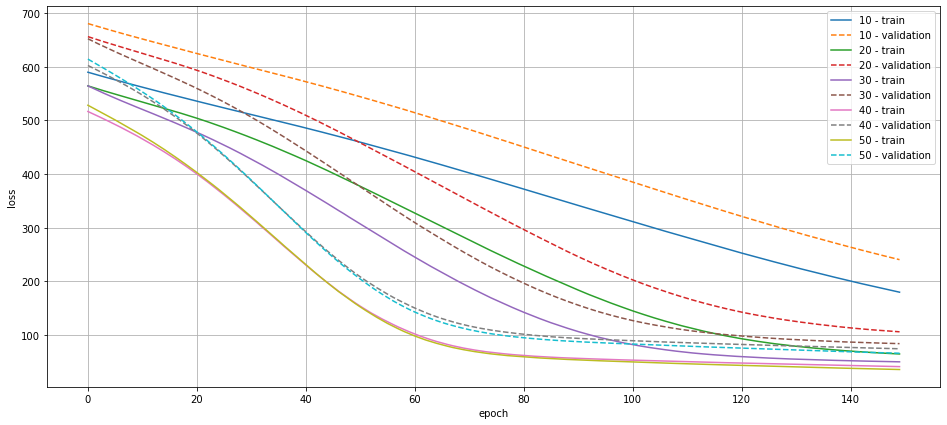

In [5]:
plt.figure(figsize=(16,7))

epochs = 150

result = []

for neuron_num in [10, 20, 30, 40, 50]:
  
  # Build the model.
  model = Sequential([ Dense(neuron_num, 
                             activation='relu', 
                             input_shape=(13,)),
                       Dense(1, 
                             activation='linear')])

  # Compile the model.
  model.compile(
      optimizer='adam',
      loss='mse',
      metrics=['mse'],
  )

  # Train the model.
  history = model.fit(
      X_train,
      train_target,
      epochs=epochs,
      batch_size=120, 
      validation_split=0.3
  )

  # результаты
  model_name = f'Model of {neuron_num} neurons'
  model_metric = history.history['mse'][epochs-1]
  model_val_metric = history.history['val_mse'][epochs-1]
  
  result.append([model_name, model_metric, model_val_metric])


  plt.plot(np.arange(epochs), history.history['loss'],    '-',  label = f'{neuron_num} - train')
  plt.plot(np.arange(epochs), history.history['val_loss'],'--', label = f'{neuron_num} - validation')
  
plt.legend()
plt.grid('On')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [6]:
result_table = pd.DataFrame(result, columns=['model_name', 'model_metric', 'model_val_metric']).sort_values('model_val_metric', ascending=True)
result_table.head(5)

,model_name,model_metric,model_val_metric
4,Model of 50 neurons,35.229332,65.580444
3,Model of 40 neurons,40.614220,73.917572
2,Model of 30 neurons,49.558228,83.480598
1,Model of 20 neurons,64.232124,105.585655
0,Model of 10 neurons,179.486038,240.192368


Модель 2.

1. Функция активации - relu
2. Количество слоев - [2, 3, 5, 10]
3. Оптимизацтор - Adam
4. Число нейронов в скрытом слое - 40

Epoch 1/150
3/3 [==============================] - 1s 61ms/step - loss: 553.7647 - mse: 553.7647 - val_loss: 639.7328 - val_mse: 639.7328
Epoch 2/150
3/3 [==============================] - 0s 17ms/step - loss: 548.9603 - mse: 548.9604 - val_loss: 634.8206 - val_mse: 634.8206
Epoch 3/150
3/3 [==============================] - 0s 16ms/step - loss: 544.3454 - mse: 544.3454 - val_loss: 629.9357 - val_mse: 629.9357
Epoch 4/150
3/3 [==============================] - 0s 15ms/step - loss: 539.6717 - mse: 539.6717 - val_loss: 625.0965 - val_mse: 625.0965
Epoch 5/150
3/3 [==============================] - 0s 17ms/step - loss: 535.0933 - mse: 535.0933 - val_loss: 620.2893 - val_mse: 620.2893
Epoch 6/150
3/3 [==============================] - 0s 18ms/step - loss: 530.5862 - mse: 530.5862 - val_loss: 615.4958 - val_mse: 615.4958
Epoch 7/150
3/3 [==============================] - 0s 16ms/step - loss: 526.0075 - mse: 526.0075 - val_loss: 610.7526 - val_mse: 610.7526
Epoch 8/150
3/3 [=================

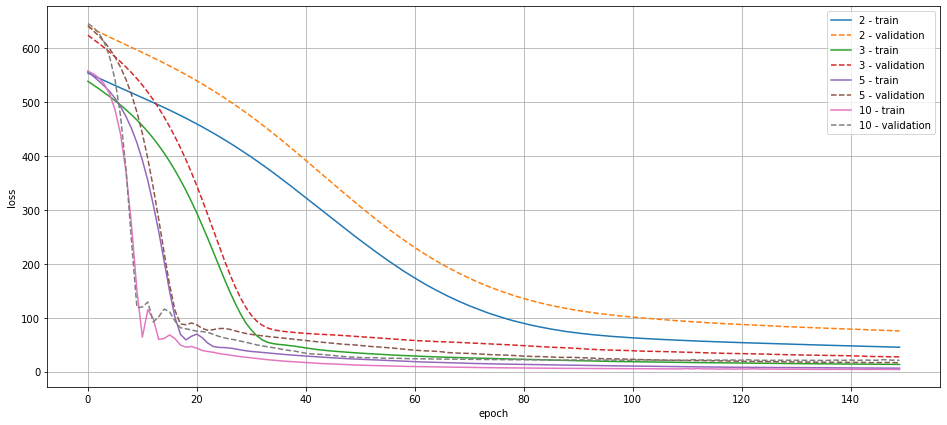

In [7]:
plt.figure(figsize=(16,7))

epochs = 150

result = []

neuron_num = 40

for layers_num in [2, 3, 5, 10]:

  layers_ = [Dense(neuron_num, activation='relu', input_shape=(13,))]
  for l in range(layers_num-2):
    layers_.append(Dense(neuron_num, activation='relu'))
  layers_.append(Dense(1, activation='linear'))
  
  # Build the model.
  model = Sequential(layers_)

  # Compile the model.
  model.compile(
      optimizer='adam',
      loss='mse',
      metrics=['mse'],
  )

  # Train the model.
  history = model.fit(
      X_train,
      train_target,
      epochs=epochs,
      batch_size=120, 
      validation_split=0.3
  )

  # результаты
  model_name = f'Model with {layers_num} layers'
  model_metric = history.history['mse'][epochs-1]
  model_val_metric = history.history['val_mse'][epochs-1]
  
  result.append([model_name, model_metric, model_val_metric])


  plt.plot(np.arange(epochs), history.history['loss'],    '-',  label = f'{layers_num} - train')
  plt.plot(np.arange(epochs), history.history['val_loss'],'--', label = f'{layers_num} - validation')
  
plt.legend()
plt.grid('On')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [8]:
result_table = pd.DataFrame(result, columns=['model_name', 'model_metric', 'model_val_metric']).sort_values('model_val_metric', ascending=True)
result_table.head(5)

,model_name,model_metric,model_val_metric
2,Model with 5 layers,6.359902,16.489960
3,Model with 10 layers,3.908273,20.875521
1,Model with 3 layers,13.212569,27.218552
0,Model with 2 layers,45.139217,75.406296


Чем больше слоев , тем лучше результат

### Модель 3.
1. Функция активации - relu
2. Количество слоев - 10
3. Оптимизатор - ['adam', 'sgd', 'rmsprop']
4. Число нейронов в скрытом слое - 40

Epoch 1/150
3/3 [==============================] - 1s 73ms/step - loss: 558.1747 - mse: 558.1747 - val_loss: 649.3512 - val_mse: 649.3512
Epoch 2/150
3/3 [==============================] - 0s 15ms/step - loss: 556.9788 - mse: 556.9788 - val_loss: 647.7595 - val_mse: 647.7595
Epoch 3/150
3/3 [==============================] - 0s 14ms/step - loss: 555.3249 - mse: 555.3249 - val_loss: 645.2307 - val_mse: 645.2307
Epoch 4/150
3/3 [==============================] - 0s 15ms/step - loss: 552.6674 - mse: 552.6674 - val_loss: 641.3542 - val_mse: 641.3542
Epoch 5/150
3/3 [==============================] - 0s 14ms/step - loss: 548.6008 - mse: 548.6008 - val_loss: 635.3068 - val_mse: 635.3068
Epoch 6/150
3/3 [==============================] - 0s 15ms/step - loss: 542.3915 - mse: 542.3915 - val_loss: 625.6487 - val_mse: 625.6487
Epoch 7/150
3/3 [==============================] - 0s 15ms/step - loss: 532.3140 - mse: 532.3140 - val_loss: 609.9719 - val_mse: 609.9719
Epoch 8/150
3/3 [=================

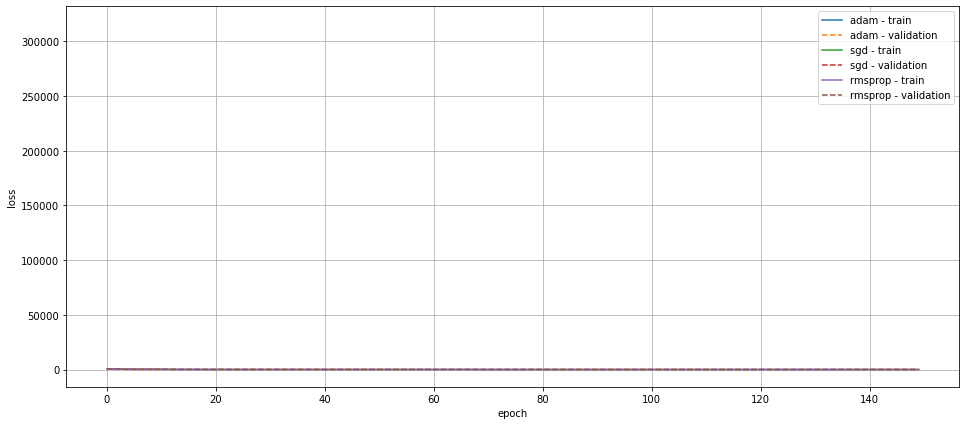

In [9]:
plt.figure(figsize=(16,7))

epochs = 150

result = []

neuron_num = 40
layers_num = 10

optimizers = ['adam', 'sgd', 'rmsprop']

for opt in optimizers:

  layers_ = [Dense(neuron_num, activation='relu', input_shape=(13,))]
  for l in range(layers_num-2):
    layers_.append(Dense(neuron_num, activation='relu'))
  layers_.append(Dense(1, activation='linear'))
  
  # Build the model.
  model = Sequential(layers_)

  # Compile the model.
  model.compile(
      optimizer=opt,
      loss='mse',
      metrics=['mse'],
  )

  # Train the model.
  history = model.fit(
      X_train,
      train_target,
      epochs=epochs,
      batch_size=120, 
      validation_split=0.3
  )

  # результаты
  model_name = f'Model with {opt} layers'
  model_metric = history.history['mse'][epochs-1]
  model_val_metric = history.history['val_mse'][epochs-1]
  
  result.append([model_name, model_metric, model_val_metric])


  plt.plot(np.arange(epochs), history.history['loss'],    '-',  label = f'{opt} - train')
  plt.plot(np.arange(epochs), history.history['val_loss'],'--', label = f'{opt} - validation')
  
plt.legend()
plt.grid('On')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [10]:
result_table = pd.DataFrame(result, columns=['model_name', 'model_metric', 'model_val_metric']).sort_values('model_val_metric', ascending=True)
result_table.head(5)

,model_name,model_metric,model_val_metric
0,Model with adam layers,3.762993,16.547520
2,Model with rmsprop layers,7.401888,20.295376
1,Model with sgd layers,NaN,NaN


#### Модель 4.
1. Функция активации - ['relu', 'tanh', 'linear', 'sigmoid']
2. Количество слоев - 10
3. Оптимизацтор - adam
4. Число нейронов в скрытом слое - 40

Epoch 1/150
3/3 [==============================] - 1s 77ms/step - loss: 556.9510 - mse: 556.9510 - val_loss: 646.3482 - val_mse: 646.3482
Epoch 2/150
3/3 [==============================] - 0s 15ms/step - loss: 553.2397 - mse: 553.2397 - val_loss: 640.7556 - val_mse: 640.7556
Epoch 3/150
3/3 [==============================] - 0s 14ms/step - loss: 547.1929 - mse: 547.1929 - val_loss: 631.6398 - val_mse: 631.6398
Epoch 4/150
3/3 [==============================] - 0s 15ms/step - loss: 537.2909 - mse: 537.2909 - val_loss: 616.5422 - val_mse: 616.5422
Epoch 5/150
3/3 [==============================] - 0s 15ms/step - loss: 520.6646 - mse: 520.6646 - val_loss: 591.8213 - val_mse: 591.8213
Epoch 6/150
3/3 [==============================] - 0s 15ms/step - loss: 494.9188 - mse: 494.9189 - val_loss: 552.1738 - val_mse: 552.1738
Epoch 7/150
3/3 [==============================] - 0s 14ms/step - loss: 452.5139 - mse: 452.5139 - val_loss: 489.9166 - val_mse: 489.9166
Epoch 8/150
3/3 [=================

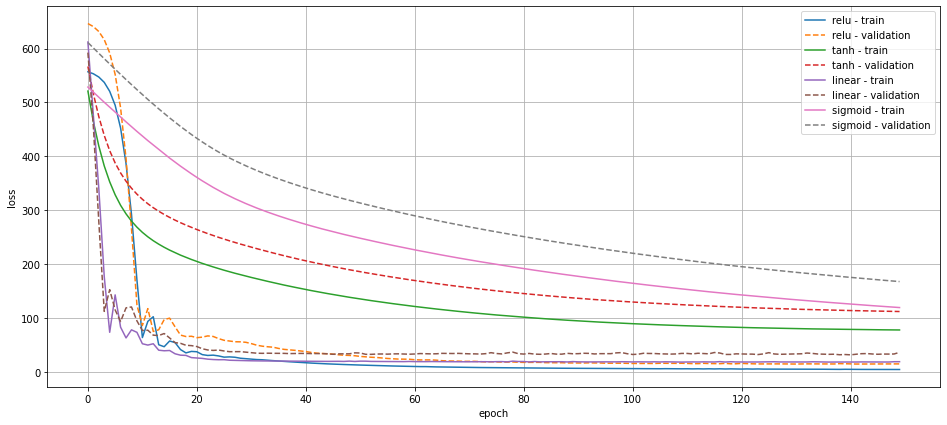

In [11]:
plt.figure(figsize=(16,7))

epochs = 150

result = []

neuron_num = 40
layers_num = 10
opt = 'adam'

activations = ['relu', 'tanh', 'linear', 'sigmoid']

for act in activations:

  layers_ = [Dense(neuron_num, activation=act, input_shape=(13,))]
  for l in range(layers_num-2):
    layers_.append(Dense(neuron_num, activation=act))
  layers_.append(Dense(1, activation='linear'))
  
  # Build the model.
  model = Sequential(layers_)

  # Compile the model.
  model.compile(
      optimizer=opt,
      loss='mse',
      metrics=['mse'],
  )

  # Train the model.
  history = model.fit(
      X_train,
      train_target,
      epochs=epochs,
      batch_size=120, 
      validation_split=0.3
  )

  # результаты
  model_name = f'Model with {act} activation'
  model_metric = history.history['mse'][epochs-1]
  model_val_metric = history.history['val_mse'][epochs-1]
  
  result.append([model_name, model_metric, model_val_metric])


  plt.plot(np.arange(epochs), history.history['loss'],    '-',  label = f'{act} - train')
  plt.plot(np.arange(epochs), history.history['val_loss'],'--', label = f'{act} - validation')
  
plt.legend()
plt.grid('On')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [12]:
result_table = pd.DataFrame(result, columns=['model_name', 'model_metric', 'model_val_metric']).sort_values('model_val_metric', ascending=True)
result_table.head(5)

,model_name,model_metric,model_val_metric
0,Model with relu activation,4.634474,15.037883
2,Model with linear activation,19.103746,36.458607
1,Model with tanh activation,77.962791,112.191063
3,Model with sigmoid activation,119.543381,167.739441


лучшие результаты показали линейные модели


#### Задание 2.

In [13]:
losses = ['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error']
metrics = ['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error']

In [14]:
epochs = 200

result = []

neuron_num = 40
layers_num = 10
opt = 'adam'

In [15]:
layers_ = [Dense(neuron_num, activation='relu', input_shape=(13,))]
for l in range(layers_num-2):
  layers_.append(Dense(neuron_num, activation='relu'))
layers_.append(Dense(1, activation='linear'))
  
# Build the model.
model = Sequential(layers_)

In [16]:
for loss_ in losses:
    for metric_ in metrics:
    
        model.compile(optimizer=opt,
                      loss=loss_,
                      metrics=[metric_])
        
        model.fit(X_train, 
                  train_target,
                  epochs=epochs,
                  batch_size=120, 
                  validation_split=0.3)
        
        # Коэффициент детерминации на предсказании тестовой выборки
        y_test_pred = model.predict(X_test)
        
        [loss, metric] = model.evaluate(X_test, test_target, verbose=0)
               
        # накопление результатов
        result.append([loss_, loss, metric_, metric, r2_score(test_target, y_test_pred[:,0])])

Epoch 1/200
3/3 [==============================] - 1s 72ms/step - loss: 557.6031 - mean_squared_error: 557.6031 - val_loss: 647.0554 - val_mean_squared_error: 647.0554
Epoch 2/200
3/3 [==============================] - 0s 15ms/step - loss: 554.1157 - mean_squared_error: 554.1157 - val_loss: 641.9265 - val_mean_squared_error: 641.9265
Epoch 3/200
3/3 [==============================] - 0s 15ms/step - loss: 548.5169 - mean_squared_error: 548.5169 - val_loss: 633.7590 - val_mean_squared_error: 633.7590
Epoch 4/200
3/3 [==============================] - 0s 15ms/step - loss: 540.0194 - mean_squared_error: 540.0194 - val_loss: 621.0526 - val_mean_squared_error: 621.0526
Epoch 5/200
3/3 [==============================] - 0s 15ms/step - loss: 526.5022 - mean_squared_error: 526.5022 - val_loss: 601.2094 - val_mean_squared_error: 601.2094
Epoch 6/200
3/3 [==============================] - 0s 14ms/step - loss: 505.5688 - mean_squared_error: 505.5688 - val_loss: 570.2021 - val_mean_squared_error: 5

In [17]:
result_table = pd.DataFrame(result, columns=['loss name', 'loss value', 'metric name', 'metric value', 'r2 score']).sort_values('r2 score', ascending=False)
result_table.head(10)

,loss name,loss value,metric name,metric value,r2 score
0,mean_squared_error,13.260110,mean_squared_error,13.260110,0.840708
3,mean_absolute_error,2.828187,mean_squared_error,13.752249,0.834796
2,mean_squared_error,13.756233,mean_absolute_percentage_error,13.998379,0.834748
1,mean_squared_error,13.773536,mean_absolute_error,2.843741,0.834540
7,mean_absolute_percentage_error,14.411841,mean_absolute_error,2.912634,0.820120
5,mean_absolute_error,2.926266,mean_absolute_percentage_error,14.301734,0.817849
4,mean_absolute_error,2.969833,mean_absolute_error,2.969833,0.814835
8,mean_absolute_percentage_error,14.678946,mean_absolute_percentage_error,14.678946,0.813907
6,mean_absolute_percentage_error,14.423615,mean_squared_error,15.840167,0.809714


*на точность сетки влиляяют:
***
     1. выбор активатора
     2. подбор количества эпох
     3. выбор количества слоев и количества нейронов в них
